# Turecki, MDD from HCA

- https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE144136
- 10X Genomics Chromium snRNA-seq was performed on nuclei extracted from BA9 of the post-mortem brain tissue of 17 control subjects and 17 MDD cases who died by suicide. All subjects were male. Cell-types were identified by unsupervised clustering and diffrential gene expression was performed between cases and controls for each cell-type cluster. The library preparation was performed with the Chromium Singel Cell 3’ Reagent Kits v2. Paired-end sequencing was performed on the HiSeq Illumina 4000. FastQ files were produced with Cellranger v2.1.0 mkfastq. Alignments and gene counts were generated with Cellranger v2.1.0 count.

In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
# Load dataset
adata = sc.read_mtx('/home/sonic/scData/HCA_Turecki_MDD/GSE144136_GeneBarcodeMatrix_Annotated.mtx.gz')
adata = adata.transpose()

In [5]:
# Add barcodes data
barcodes = pd.read_csv('/home/sonic/scData/HCA_Turecki_MDD/GSE144136_CellNames.csv.gz', sep=',', index_col=0)
barcodes.reset_index(drop=True, inplace=True)
adata.obs = barcodes

In [6]:
# Create a observation data 
adata.obs['cluster_original'] = adata.obs['x'].str.split('.').str[0]
adata.obs['x2'] = adata.obs['x'].str.split('.').str[1]
adata.obs['sampleID'] = 'brain_donor_' + adata.obs['x2'].str.split('_').str[0]
adata.obs.set_index('x', inplace=True)

In [7]:
adata.obs

,cluster_original,x2,sampleID
x,,,
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4,3_Control_B3_AAACCTGAGGTAGCCA,brain_donor_3
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5,3_Control_B3_AAACCTGCAAACTGTC,brain_donor_3
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4,3_Control_B3_AAACCTGCAACAACCT,brain_donor_3
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6,3_Control_B3_AAACCTGGTCCGAACC,brain_donor_3
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP,3_Control_B3_AAACCTGGTCGTGGCT,brain_donor_3
...,...,...,...
OPCs_1.17_Suicide_B1_TTTGTCAAGCTCCTTC,OPCs_1,17_Suicide_B1_TTTGTCAAGCTCCTTC,brain_donor_17
Ex_10_L2_4.17_Suicide_B1_TTTGTCAAGGCTAGCA,Ex_10_L2_4,17_Suicide_B1_TTTGTCAAGGCTAGCA,brain_donor_17
Ex_10_L2_4.17_Suicide_B1_TTTGTCAAGGGATGGG,Ex_10_L2_4,17_Suicide_B1_TTTGTCAAGGGATGGG,brain_donor_17


In [8]:
adata.obs.cluster_original.unique()

array(['Ex_10_L2_4', 'Inhib_5', 'Ex_8_L5_6', 'Inhib_2_VIP', 'Mix_2',
       'Oligos_3', 'Ex_7_L4_6', 'Astros_3', 'Ex_5_L5', 'Micro/Macro',
       'Astros_2', 'Ex_6_L4_6', 'Inhib_1', 'OPCs_1', 'Inhib_3_SST',
       'Inhib_6_SST', 'Ex_2_L5', 'Inhib_8_PVALB', 'Mix_5',
       'Inhib_7_PVALB', 'Ex_3_L4_5', 'Mix_4', 'Oligos_2', 'Mix_3', 'Endo',
       'OPCs_2', 'Ex_1_L5_6', 'Mix_1', 'Oligos_1', 'Ex_9_L5_6',
       'Ex_4_L_6', 'Inhib_4_SST', 'Astros_1'], dtype=object)

In [9]:
# Update the cell type
adata.obs['cluster_main'] = 'Others'
adata.obs.loc[adata.obs['cluster_original'].str.contains('Ex_'), 'cluster_main'] = 'Ext'
adata.obs.loc[adata.obs['cluster_original'].str.contains('Inhib_'), 'cluster_main'] = 'IN'
adata.obs.loc[adata.obs['cluster_original'].str.contains('Oligos_'), 'cluster_main'] = 'OD'
adata.obs.loc[adata.obs['cluster_original'].str.contains('OPCs_'), 'cluster_main'] = 'OPC'
adata.obs.loc[adata.obs['cluster_original'].str.contains('Astros_'), 'cluster_main'] = 'Astro'
adata.obs.loc[adata.obs['cluster_original']=='Micro/Macro', 'cluster_main'] = 'MG'
adata.obs.loc[adata.obs['cluster_original']=='Endo', 'cluster_main'] = 'Others'
adata.obs.loc[adata.obs['cluster_original'].str.contains('Mix_'), 'cluster_main'] = 'Others'


In [10]:
adata.obs.groupby('cluster_main').count()

,cluster_original,x2,sampleID
cluster_main,,,
Astro,4057,4057,4057
Ext,44976,44976,44976
IN,14607,14607,14607
MG,1327,1327,1327
OD,5894,5894,5894
OPC,2263,2263,2263
Others,5762,5762,5762


In [11]:
# Add feature data
features = pd.read_csv('/home/sonic/scData/HCA_Turecki_MDD/GSE144136_GeneNames.csv.gz', sep=',', index_col=0)
features.reset_index(drop=True, inplace=True)
adata.var = features
adata.var.set_index('x', inplace=True)

In [12]:
adata.var

""
x
RP11-34P13.3
RP11-34P13.7
RP11-34P13.14
FO538757.3
FO538757.2
...
AL354822.1
AC023491.2
AC004556.1


In [13]:
# Barcode가 실제 작동하는지 확인하기 위해 UMAP
adata_int = adata.copy()
sc.pp.normalize_total(adata_int)
sc.pp.log1p(adata_int)

In [14]:
sc.pp.highly_variable_genes(adata_int, n_top_genes=2000)

In [15]:
sc.tl.pca(adata_int)

In [16]:
sc.pp.neighbors(adata_int, n_neighbors=10, n_pcs=50)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
sc.tl.umap(adata_int)
sc.tl.leiden(adata_int, resolution=0.5)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


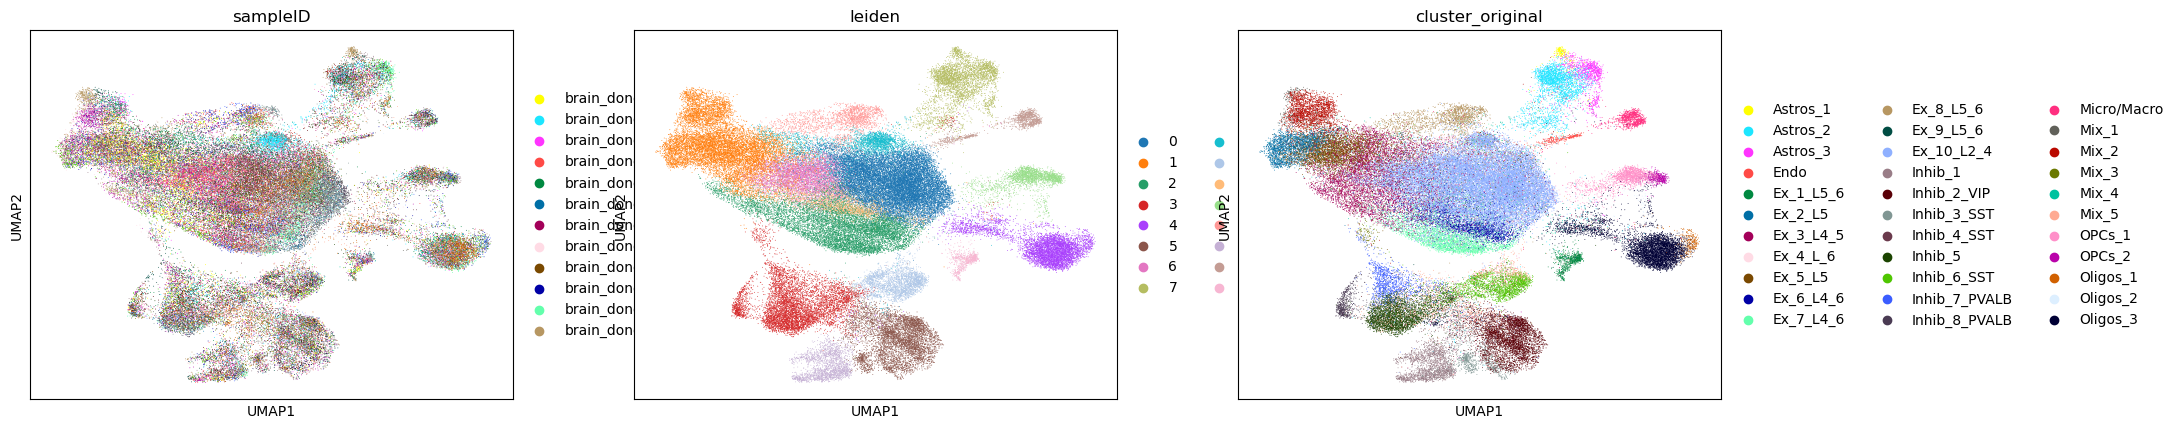

In [18]:
sc.pl.umap(adata_int, color=['sampleID', 'leiden', 'cluster_original'])

In [19]:
meta = pd.read_csv('/home/sonic/scData/HCA_Turecki_MDD/BrainDepressiveDisorder 2023-03-09 19.04.tsv', sep='\t')
meta.rename(columns={'library_preparation_protocol.library_construction_approach':'Assay', 
                     'donor_organism.biomaterial_core.biomaterial_id':'sampleID', 
                     'specimen_from_organism.organ_part':'Organ',
                     'donor_organism.sex':'Sex',
                     'donor_organism.diseases':'Diagnosis',
                     'donor_organism.organism_age':'Age'}, inplace=True)

# Make a unique list for each sample
meta = meta[meta.read_index=='read1']

# Update information
meta['Brain_Region'] = 'BA9'
meta['batch'] = 'Unknown'
meta['Race'] = 'Unknown'
meta['PMI'] = 'Unknown'
meta['Stage'] = 'Adult'
meta['Dataset'] = 'Turecki'
meta['Assay'] = "10x Chromium 3' v2"
meta['Library'] = 'snRNA'
meta['Hemisphere'] = 'A'
meta.loc[meta['Sex']=='female', 'Sex'] = 'F'
meta.loc[meta['Sex']=='male', 'Sex'] = 'M'

# Subset
cols_to_use = ['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 
               'Library','Hemisphere',
               'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis']
meta = meta[cols_to_use]
meta = meta.drop_duplicates()
meta.shape

(34, 13)

In [20]:
meta

,batch,sampleID,Age,Assay,Stage,Race,Library,Hemisphere,PMI,Brain_Region,Dataset,Sex,Diagnosis
0,Unknown,brain_donor_13,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
8,Unknown,brain_donor_4,36-46 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,major depressive disorder
9,Unknown,brain_donor_24,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
11,Unknown,brain_donor_9,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
13,Unknown,brain_donor_25,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
14,Unknown,brain_donor_19,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
15,Unknown,brain_donor_32,36-46 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,major depressive disorder
17,Unknown,brain_donor_22,34-43 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,normal
20,Unknown,brain_donor_33,36-46 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,major depressive disorder
22,Unknown,brain_donor_5,36-46 year,10x Chromium 3' v2,Adult,Unknown,snRNA,A,Unknown,BA9,Turecki,M,major depressive disorder


In [21]:
def calculate_age(age):
    if ' year' in age:
        # Extract the numeric part of the age string and convert it to an integer
        age_years = int(age.split(' year')[0].split('-')[0])
        # Multiply the age in years by 365 and add 365 to get the age in days
        age_days = age_years * 365 + 365
        return age_days
    elif 'ga' in age:
        # Extract the numeric part of the age string and convert it to an integer
        age_weeks = int(age.split('ga')[1])
        # Multiply the age in years by 365 and add 365 to get the age in days
        age_days = age_weeks * 7
        return age_days
    elif 'pcw' in age:
        # Extract the numeric part of the age string and convert it to an integer
        age_weeks = int(age.split('pcw')[1])
        # Multiply the age in years by 365 and add 365 to get the age in days
        age_days = age_weeks * 7
        return age_days
    else:
        # If the age string doesn't contain 'd' or 'y', return None
        return None

In [22]:
meta['Age'] = meta['Age'].apply(calculate_age)

In [23]:
adata.obs['x2'] = adata.obs.index

In [24]:
adata.obs = pd.merge(adata.obs, meta, on='sampleID', how='left')

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [25]:
adata.obs = adata.obs.set_index('x2')

In [33]:
adata.obs.Diagnosis.value_counts()

MDD       43674
normal    35212
Name: Diagnosis, dtype: int64

In [32]:
# adata1 = adata[adata.obs.Diagnosis=='normal']
adata.obs['Diagnosis'] = adata.obs['Diagnosis'].astype('str')
adata.obs.loc[adata.obs['Diagnosis']=='major depressive disorder', 'Diagnosis'] = 'MDD'

In [34]:
adata.write('/home/sonic/scData/anndata/HCA_Turecki.h5ad')

In [28]:
adata1

View of AnnData object with n_obs × n_vars = 35212 × 30062
    obs: 'cluster_original', 'sampleID', 'cluster_main', 'batch', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis'